# Работа с множеством данных Titanic. Цель - предсказание классификации выживших пассажиров.

# Импорт необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

# Необходимо указать %matplotlib inline, для того чтобы визуализировать данные в Jupyter Notebook.

In [4]:
%matplotlib inline

# Далее необходимо считать данные из csv файла, в котором находится некоторая статистическая информация о пассажирах Титаника.

In [73]:
training_set = pd.read_csv('train.csv')

# Далее можно по смотреть, что находится в созданном training_set объекте.

In [74]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Применение метода isnull() позволяет лучше увидеть, какие данные присутствуют в training_set, и чего неизвестно. False - есть данные. True - нет.

In [75]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Наглядное представление отсутствующих данных. Большой пробел в данных о каютах пассажиров. Также есть некоторая неизвестность по возрасту пассажиров.

<AxesSubplot:>

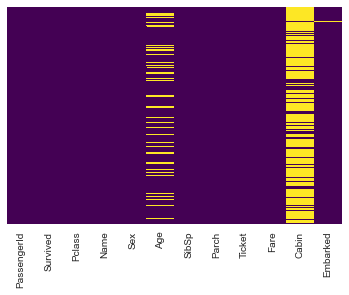

In [76]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Соотношение выживших и погибших.

In [77]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

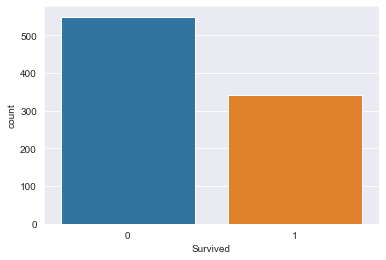

In [78]:
sns.countplot(x='Survived', data=training_set)

# Соотношение выживших и погибших, разделенное на мужской и женский пол.

<AxesSubplot:xlabel='Survived', ylabel='count'>

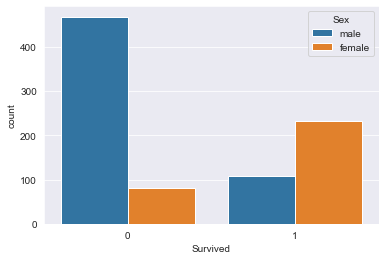

In [79]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

# Соотношение выживших и погибших, разделенное по классам. Отсюда видно, что больше всего погибло людей, которые путешевствовали 3 классом.

<AxesSubplot:xlabel='Survived', ylabel='count'>

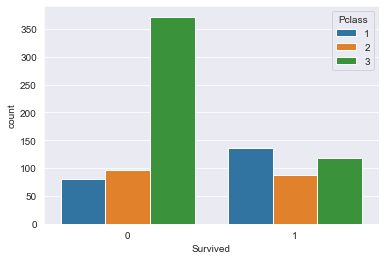

In [80]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

# График распределения количества пасажиров по возрастам. Метод dropna() позволяет исключить неизвестные значения.

<AxesSubplot:xlabel='Age', ylabel='Count'>

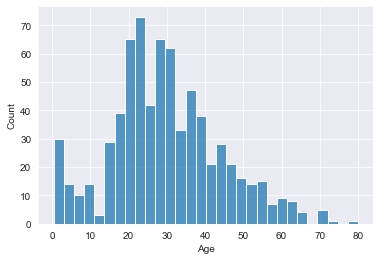

In [81]:
sns.histplot(training_set['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

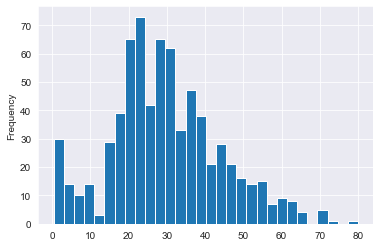

In [82]:
training_set['Age'].dropna().plot.hist(bins=30)

# Здесь представлена информация о самом training_set объекте.

In [19]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Иллюстрация информации о колличестве родственных связей между пассажирами.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

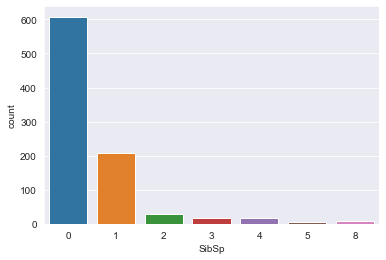

In [20]:
sns.countplot(x='SibSp', data=training_set)

# Распределение цен билетов по количеству купленных.

<AxesSubplot:>

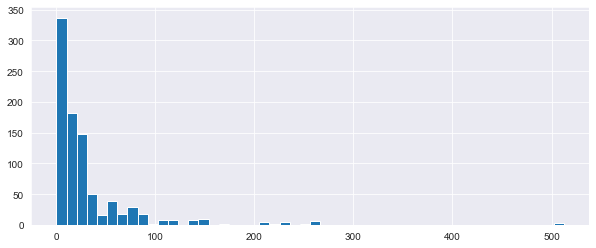

In [23]:
training_set['Fare'].hist(bins=50, figsize=(10,4))

# Далее необходимо решить проблему с недостающими данными о возрасте пассажиров. Для этого заменим пустые данные средним возрастом.

# Для начала понадобится определить средний возраст по классам, чтобы более точно подствить недостающие данные.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

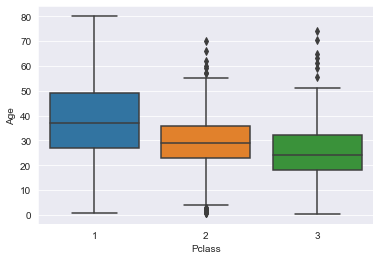

In [24]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

# Эта функция позволяет добавить средний возраст в недостающие данные по классам.

In [25]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Теперь, с помощью функции impute_age добавляются недостающие данные по возрасту.

In [26]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(impute_age, axis=1)

# Проверка того, что проблема с возрастом решена.

<AxesSubplot:>

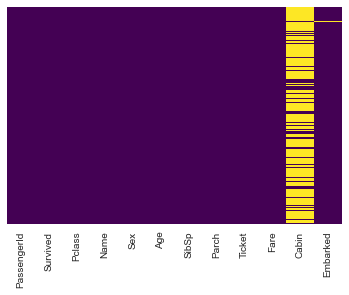

In [27]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Так как информация в столбце о кабинах не важна в данном исследовании, её можно просто отбросить.

In [28]:
training_set.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

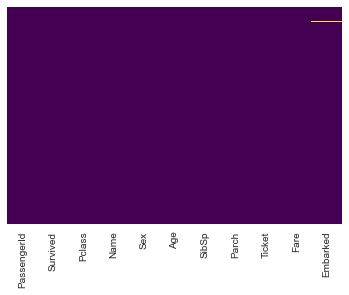

In [29]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Теперь необходимо удалить все строки с недостающими данными о том, откуда пассажир заступал на борт корабля. Так как этих строк очень мало, это никак не повлияет на точность анализа.

In [85]:
training_set.dropna(inplace=True)

# Теперь все данные известны.

<AxesSubplot:>

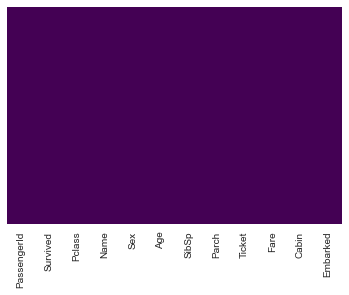

In [86]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Теперь необходимо сконвертировать категорийные характеристики в фиктивную переменную с помощью метода get_dummies.

In [34]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [35]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [36]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [37]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Добавление вновь созданных столбцов в множество данных.

In [49]:
training_set = pd.concat([training_set, sex, embark], axis=1)

# Далее необходимо убрать столбцы, которые никак не пригодятся.

In [ ]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [50]:
training_set.drop(['PassengerId'], axis=1, inplace=True)

# Теперь, данные в объекте training_set приведены к корректному виду для алгоритма машинного обучения.

In [51]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


# Разделение данных на тестовые и тренировочные, и опредление данных, которые необходимо предсказать.

In [55]:
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=42)

# Импорт класса логистической регрессии.

In [59]:
from sklearn.linear_model import LogisticRegression

# Создание объекта класса логистической регрессии.

In [60]:
lrm = LogisticRegression()

# Использование метода подгонки модели на тренировочных данных.

In [61]:
lrm.fit(X_train, y_train)

C:\Users\eugen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Переход к прогнозам на основе тестовых данных.

In [62]:
predictions = lrm.predict(X_test)

# Далее необходимо оценить производительность модели. 

In [63]:
from sklearn.metrics import classification_report

# Довольно высокие значения в данном отчете говорят об успешном применении модели машинного обучения.

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       214
           1       0.76      0.74      0.75       142

    accuracy                           0.80       356
   macro avg       0.80      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



# Матрица ошибок.

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test, predictions)

array([[181,  33],
       [ 37, 105]], dtype=int64)